# CIS Introduction

First unzip your example data to a folder you can easily find

Be sure to activate your conda environment:

``$ source activate cis_env``

In [1]:
# Ensure I don't use any local plugins. Set it to a readable folder with no Python files to avoid warnings.
%env CIS_PLUGIN_HOME=/Users/watson-parris/Pictures

env: CIS_PLUGIN_HOME=/Users/watson-parris/Pictures


In [2]:
from cis import read_data, read_data_list, get_variables

get_variables('WorkshopData2016/ARCPAC_2008/*.nc')

{'AIR_PRESSURE',
 'AIR_TEMPERATURE',
 'ALTITUDE',
 'LATITUDE',
 'LONGITUDE',
 'NUMBER_CONCENTRATION',
 'PRESSURE_ALTITUDE',
 'RELATIVE_HUMIDITY',
 'SUPERSATURATION',
 'TIME'}

In [3]:
d = read_data("WorkshopData2016/ARCPAC_2008/*.nc", "NUMBER_CONCENTRATION")
print(d)

Ungridded data: NUMBER_CONCENTRATION / (#/cm3) 
     Shape = (1268,)

     Total number of points = 1268
     Number of non-masked points = 981
     Long name = 
     Standard name = None
     Units = #/cm3
     Missing value = -9999
     Range = (17.0, 2191.0)
     History = 
     Misc attributes: 
       Missing_Value = -9999
     Coordinates: 
       TIME
          Long name = 
          Standard name = time
          Units = days since 1600-01-01 00:00:00
          Missing value = -9999
          Range = (2008-04-11 20:01:30, 2008-04-16 03:03:30)
          History = 
          Misc attributes: 
            Missing_Value = -9999
       LATITUDE
          Long name = 
          Standard name = latitude
          Units = degrees
          Missing value = -9999
          Range = (63.303199999999997, 75.128600000000006)
          History = 
          Misc attributes: 
            Missing_Value = -9999
       LONGITUDE
          Long name = 
          Standard name = longitude
          

## Plotting - 1 hour

### Ungridded time series

In [4]:
aeronet_aot_500 = read_data("WorkshopData2016/Aeronet/920801_150530_Brussels.lev20", 
                            "AOT_500")

<IPython.core.display.Javascript object>


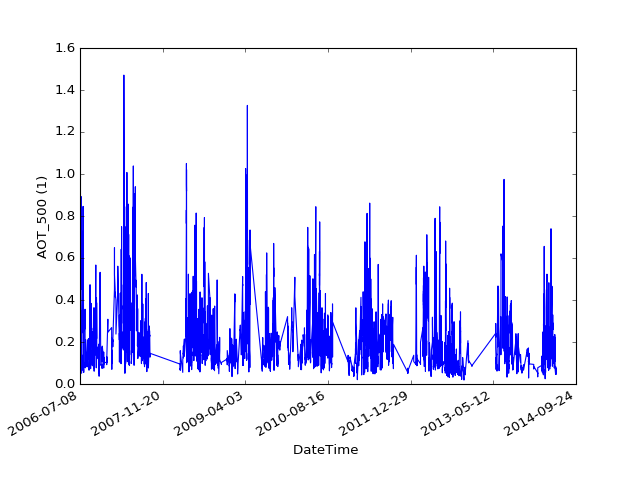

In [5]:
aeronet_aot_500.plot()

<IPython.core.display.Javascript object>


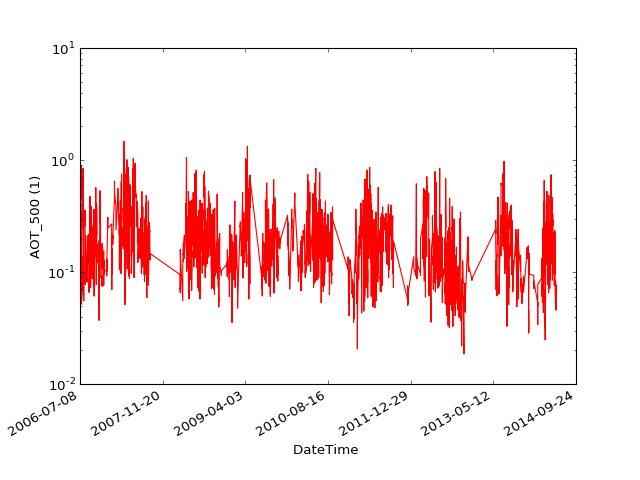

In [6]:
ax = aeronet_aot_500.plot(color='red')
ax.set_yscale('log')

<IPython.core.display.Javascript object>


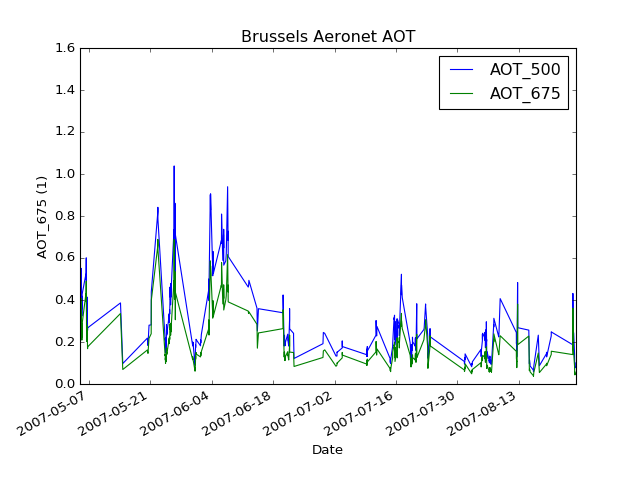

In [7]:
aeronet_aot = read_data_list("WorkshopData2016/Aeronet/920801_150530_Brussels.lev20", 
                             ['AOT_500', 'AOT_675'])
ax = aeronet_aot.plot()

In [8]:
ax.set_title('Brussels Aeronet AOT')
ax.set_xlabel('Date')

In [9]:
from datetime import datetime
ax.set_xlim(datetime(2007,5,5), datetime(2007,8,26))

(732801.0, 732914.0)

### Model time series

In [10]:
model_aod = read_data("WorkshopData2016/od550aer.nc", "od550aer")
maod_global_mean, maod_std_dev, maod_num_points = model_aod.collapsed(['x', 'y'])

/Users/watson-parris/anaconda/envs/cis_test/lib/python3.4/site-packages/iris/analysis/cartography.py:327: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


<IPython.core.display.Javascript object>


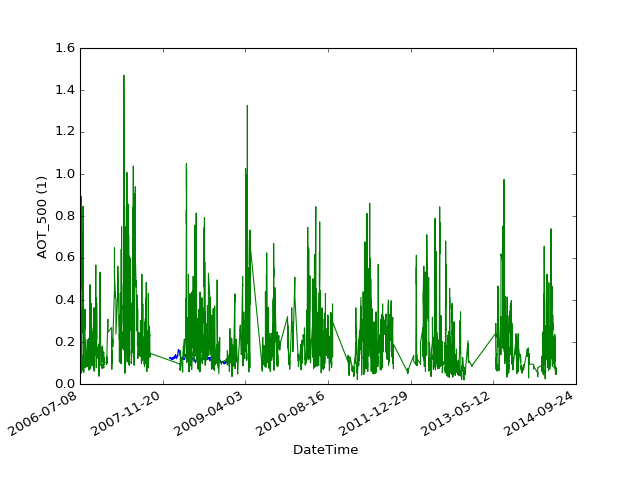

In [11]:
ax = maod_global_mean.plot()

In [12]:
aeronet_aot_500.plot(ax=ax)

### Global model plot

In [13]:
model_aod_annual_mean = model_aod.collapsed('t')

/Users/watson-parris/anaconda/envs/cis_test/lib/python3.4/site-packages/iris/analysis/cartography.py:327: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


<IPython.core.display.Javascript object>


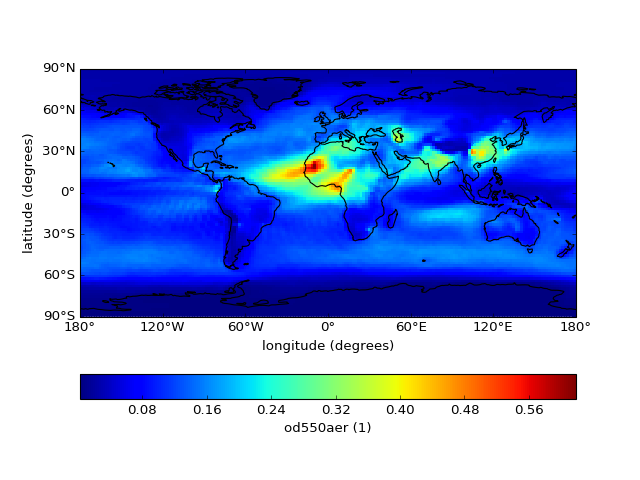

In [14]:
model_aod_annual_mean[0].plot()

<IPython.core.display.Javascript object>


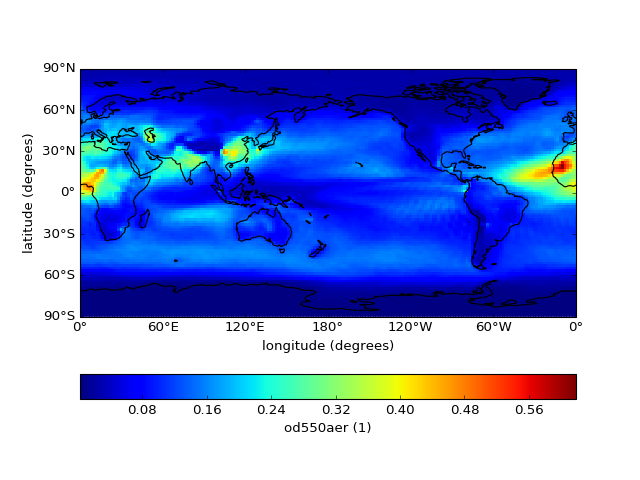

In [15]:
model_aod_annual_mean[0].plot(central_longitude=180)

### Lat/lon aircraft plots

<IPython.core.display.Javascript object>


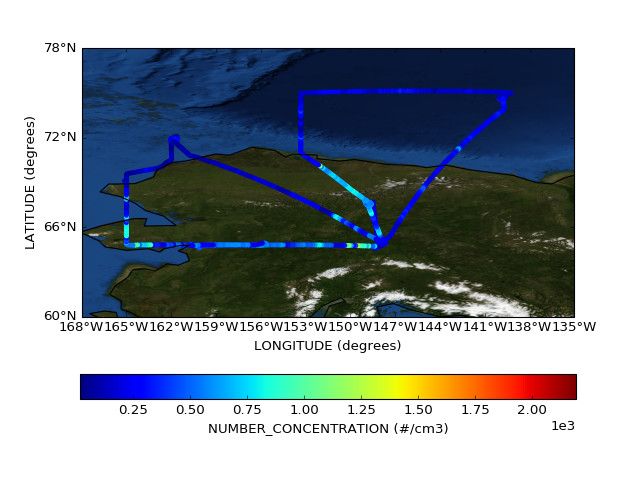

In [16]:
number_concentration = read_data('WorkshopData2016/ARCPAC_2008', 'NUMBER_CONCENTRATION')
ax = number_concentration.plot()

In [17]:
ax.bluemarble()

### Satellite plots

<IPython.core.display.Javascript object>


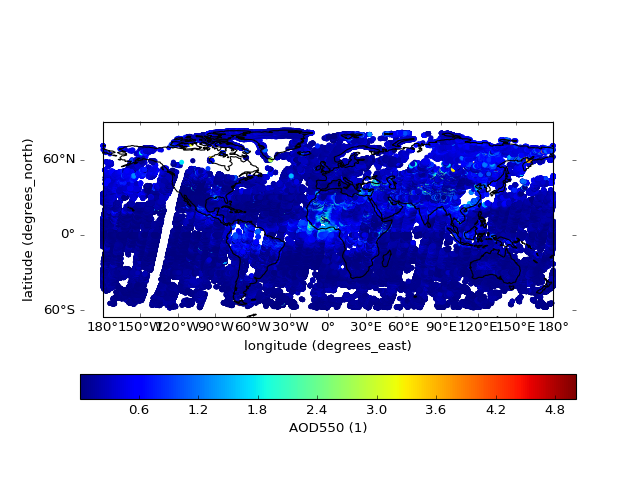

In [18]:
aerosol_cci = read_data('WorkshopData2016/AerosolCCI', 'AOD550')
aerosol_cci.plot()

<IPython.core.display.Javascript object>


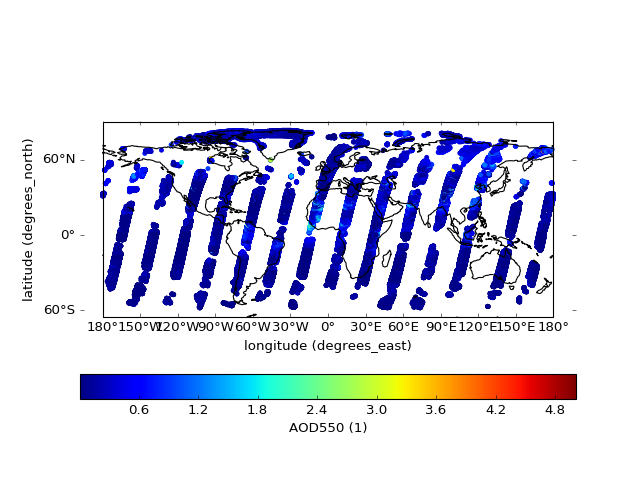

In [19]:
aerosol_cci_one_day = read_data('WorkshopData2016/AerosolCCI/20080415*.nc', 'AOD550')
ax = aerosol_cci_one_day.plot()

In [20]:
print(aerosol_cci_one_day.lat.points.max())
print(aerosol_cci_one_day.lon.points.max())
print(aerosol_cci_one_day.lat.points.min())
print(aerosol_cci_one_day.lon.points.min())

83.8024
179.999
-58.3832
-179.999


<IPython.core.display.Javascript object>


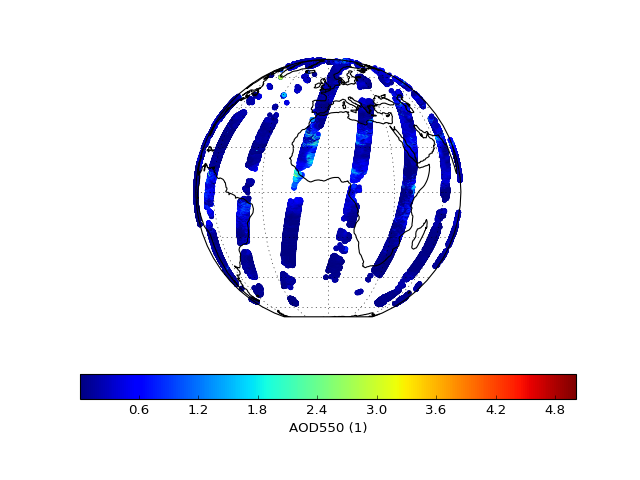

In [21]:
aerosol_cci_one_day.plot(projection='Orthographic')

<IPython.core.display.Javascript object>


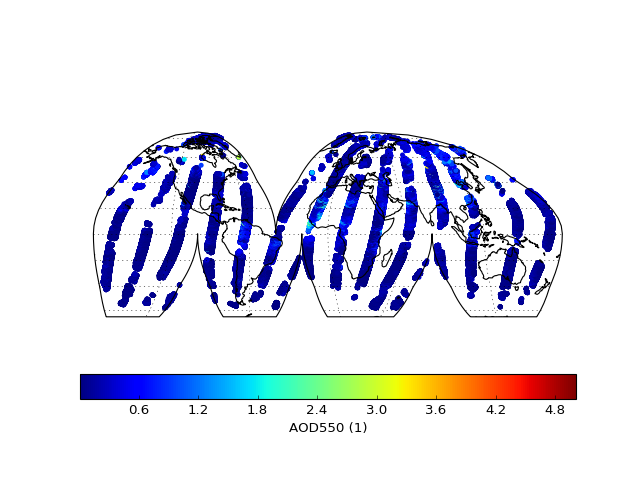

In [22]:
aerosol_cci_one_day.plot(projection='InterruptedGoodeHomolosine')

## Exercises

**1.** Try plotting ``AOT_500`` against ``AOT_675`` from the Aeronet file using a comparative scatter plot


**2.** Subset the 5 days of satellite data down to the region covered by the aircraft data, then plot it.

## Collocation - 1hr
This feels a little light at the moment, I'll need to add some exercises and think what else I can do...

### Model onto Aeronet

In [23]:
# Lets take a closer look at the model data
print(model_aod)

od550aer / (1)                      (time: 1464; latitude: 96; longitude: 192)
     Dimension coordinates:
          time                           x               -              -
          latitude                       -               x              -
          longitude                      -               -              x
     Attributes:
          CDI: Climate Data Interface version 1.6.9 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.6.9 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.0
          advection: Lin & Rood
          date_time: 20140613 051140
          echam_version: 6.1.00
          grid_type: gaussian
          history: Fri Dec 04 17:15:40 2015: cdo -r copy od550aer.nc ../../temp.nc
Tue Jul...
          host_name: p101
          institution: Max-Planck-Institute for Meteorology
          jsbach_version: 2.01
          operating_system: AIX 6.1 Power6
          physics: Modified ECMWF physics
          radiation: Modified ECMWF rad

In [24]:
from cis.time_util import PartialDateTime
# First subset the aeronet data:
aeronet_aot_500_2008 = aeronet_aot_500.subset(t=PartialDateTime(2008))

Note that we don’t actually have to do this subsetting, but that otherwise CIS will interpolate the nearest values, which in this case we don’t really want.

In [25]:
# Now do the collocation:
model_aod_onto_aeronet = model_aod.collocated_onto(aeronet_aot_500_2008)

/Users/watson-parris/anaconda/envs/cis_test/lib/python3.4/site-packages/iris/analysis/_interpolate_backdoor.py:65: IrisDeprecation: The module 'iris.analysis.interpolate' is deprecated.
  iris_warn_deprecated(msg)
/Users/watson-parris/anaconda/envs/cis_test/lib/python3.4/site-packages/cis-1.5.0-py3.4.egg/cis/collocation/gridded_interpolation.py:181: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  expanded_result[~self.missing_mask] = result


Note the updated history

<IPython.core.display.Javascript object>


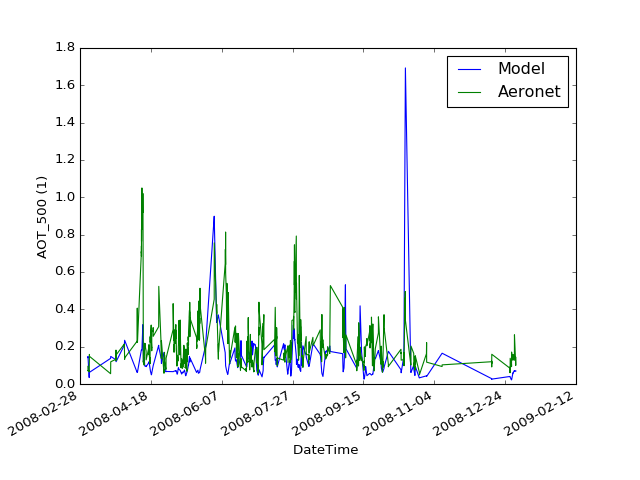

In [26]:
from cis.plotting.plot import multilayer_plot, taylor_plot
ax = multilayer_plot([model_aod_onto_aeronet[0], aeronet_aot_500_2008], layer_opts=[dict(label='Model'), dict(label='Aeronet')], xaxis='time')

<IPython.core.display.Javascript object>


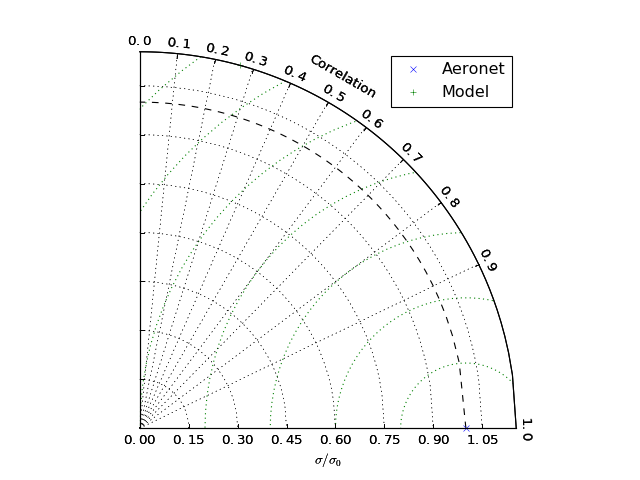

(<cis.plotting.taylor.Taylor at 0x116787e80>,
 <matplotlib.axes._subplots.Floating AxesHostAxesSubplot at 0x1159c4ef0>)

In [27]:
taylor_plot([aeronet_aot_500_2008, model_aod_onto_aeronet[0]], layer_opts=[dict(label='Aeronet'),dict(label='Model')])

In [28]:
from scipy.stats.mstats import linregress
# Lets calculate some other statistics on these two datasets
grad, intercept, r, p, stderr = linregress(model_aod_onto_aeronet[0].data, aeronet_aot_500_2008.data)

In [29]:
print(grad, stderr)

0.22996080633 0.0192470595355


In [30]:
# Basic maths on the data
aeronet_aot_500_2008.units = '1'
print(model_aod_onto_aeronet[0] - aeronet_aot_500_2008)

Ungridded data: od550aer / (1) 
     Shape = (1885,)

     Total number of points = 1885
     Number of non-masked points = 1885
     Long name = Optical thickness - total 550nm
     Standard name = None
     Units = 1
     Missing value = nan
     Range = (-0.86902314968727379, 1.3514322635449034)
     History = 2016-11-07T12:11:36Z Collocated onto sampling from: [] 
using CIS version 1.5.0 
variables: od550aer 
with files: ['WorkshopData2016/od550aer.nc'] 
using collocator: <cis.collocation.col_implementations.GriddedUngriddedCollocator object at 0x116787f98> 
kernel: lin
2016-11-07T12:11:37Z Performed unary_func operation
     Coordinates: 
       Longitude
          Long name = 
          Standard name = longitude
          Units = degrees_east
          Missing value = None
          Range = (4.3500000000000227, 4.3500000000000227)
          History = 
       Latitude
          Long name = 
          Standard name = latitude
          Units = degrees_north
          Missing value 

### Aircraft onto satellite

<img src="../images/aircraft_onto_satellite.png" />

As you can see the difficulty here is the sparseness of the aircraft data, and actually of the satellite data in this region.

In [31]:
# Read all of the AOD satelite variables
aerosol_cci = read_data_list('WorkshopData2016/AerosolCCI', 'AOD*0')
aoerosol_cci_Alaska = aerosol_cci.subset(x=[-170,-100],y=[35,80])

<IPython.core.display.Javascript object>


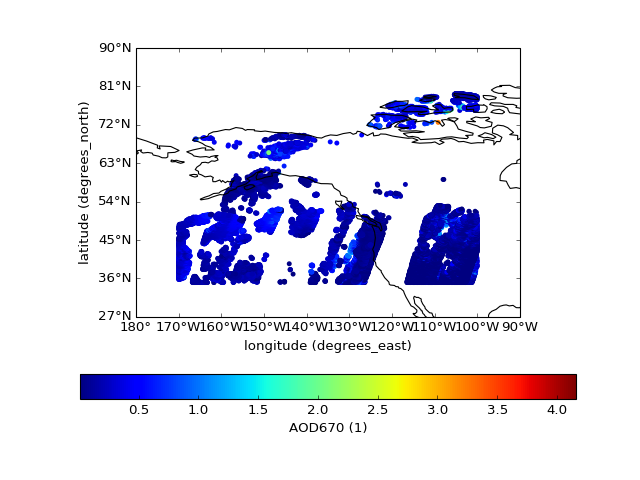

In [32]:
aoerosol_cci_Alaska[0].plot(yaxis='latitude')

In [33]:
aerosol_cci_collocated = aoerosol_cci_Alaska.collocated_onto(number_concentration, h_sep=10, t_sep='P1D')

/Users/watson-parris/anaconda/envs/cis_test/lib/python3.4/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/watson-parris/anaconda/envs/cis_test/lib/python3.4/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [34]:
aerosol_cci_collocated.append(number_concentration)
print(aerosol_cci_collocated)

UngriddedDataList: 
0: Ungridded data: AOD670 / (1) 
1: Ungridded data: AOD670_std_dev / (1) 
2: Ungridded data: AOD670_num_points / (unknown) 
3: Ungridded data: AOD1600 / (1) 
4: Ungridded data: AOD1600_std_dev / (1) 
5: Ungridded data: AOD1600_num_points / (unknown) 
6: Ungridded data: AOD870 / (1) 
7: Ungridded data: AOD870_std_dev / (1) 
8: Ungridded data: AOD870_num_points / (unknown) 
9: Ungridded data: AOD550 / (1) 
10: Ungridded data: AOD550_std_dev / (1) 
11: Ungridded data: AOD550_num_points / (unknown) 
12: Ungridded data: NUMBER_CONCENTRATION / (#/cm3) 
Coordinates: 
  TIME
  LATITUDE
  LONGITUDE
  ALTITUDE



In [35]:
aerosol_cci_collocated = aerosol_cci_collocated[::3]

<IPython.core.display.Javascript object>


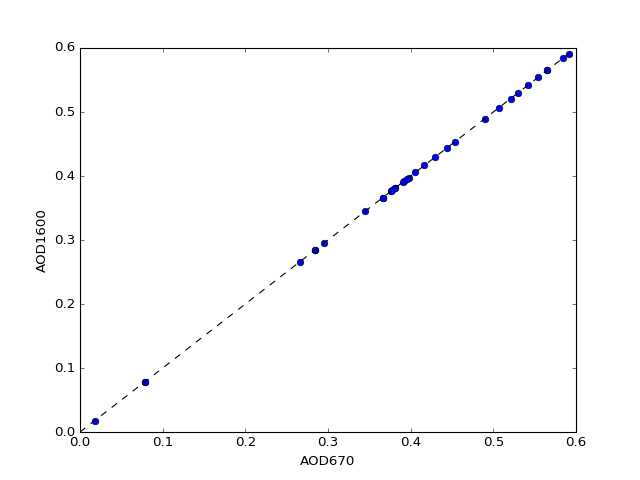

In [36]:
aerosol_cci_collocated[:2].plot('comparativescatter')

## Exercises

**1.** How does the correlation change if we only include those average number concentrations which averaged more than one point?

**2.** Consider the case of comparing our model AOD with the AerosolCCI.

**a.** What strategies could you employ?
    
**b.** Perform an initial assesment of the model AOD field using the Aerosol CCI data for the few days we have data.

## CIS and Pandas

In [37]:
df = aerosol_cci_collocated.as_data_frame()
print(df)

                     ALTITUDE  LATITUDE  LONGITUDE    AOD670   AOD1600  \
2008-04-11 20:01:30     233.4   64.8029  -147.8828  0.284781  0.284781   
2008-04-11 20:02:30     652.9   64.7594  -147.9471  0.294635  0.294635   
2008-04-11 20:03:30    1099.1   64.7385  -148.0415  0.345198  0.345198   
2008-04-11 20:04:30    1496.7   64.7820  -148.1129  0.391794  0.391794   
2008-04-11 20:05:30    1877.5   64.8434  -148.1207  0.443872  0.443872   
2008-04-11 20:06:30    2245.8   64.9073  -148.1275  0.520862  0.520862   
2008-04-11 20:07:30    2638.7   64.9720  -148.1360  0.489666  0.489666   
2008-04-11 20:08:30    3013.7   65.0354  -148.1538  0.265527  0.265527   
2008-04-11 20:09:30    3275.1   65.1007  -148.1691  0.416466  0.416466   
2008-04-11 20:10:30    3411.1   65.1700  -148.1806  0.397496  0.397496   
2008-04-11 20:11:30    3412.2   65.2419  -148.1874  0.529464  0.529464   
2008-04-11 20:12:30    3410.5   65.3126  -148.1910  0.506485  0.506485   
2008-04-11 20:13:30    3412.0   65.382

In [38]:
df.corr()
# Then do a pretty plot of it...
# This is a nice segway into the Pandas lesson.

,ALTITUDE,LATITUDE,LONGITUDE,AOD670,AOD1600,AOD870,AOD550,NUMBER_CONCENTRATION
ALTITUDE,1.000000,-0.371033,-0.036407,-0.042618,-0.042618,-0.083855,0.008630,0.518533
LATITUDE,-0.371033,1.000000,0.171710,-0.169449,-0.169449,-0.175468,-0.077648,-0.433387
LONGITUDE,-0.036407,0.171710,1.000000,0.515622,0.515622,0.404065,0.483901,-0.011983
AOD670,-0.042618,-0.169449,0.515622,1.000000,1.000000,0.846541,0.970247,-0.344245
AOD1600,-0.042618,-0.169449,0.515622,1.000000,1.000000,0.846541,0.970247,-0.344245
AOD870,-0.083855,-0.175468,0.404065,0.846541,0.846541,1.000000,0.909970,-0.295922
AOD550,0.008630,-0.077648,0.483901,0.970247,0.970247,0.909970,1.000000,-0.320531
NUMBER_CONCENTRATION,0.518533,-0.433387,-0.011983,-0.344245,-0.344245,-0.295922,-0.320531,1.000000


In [39]:
# Save the collocation output so that we can come back to it during the Pandas tutorial.
aerosol_cci_collocated.save_data('col_output.nc')